In [0]:
#!unzip air-pollution-in-seoul.zip

In [33]:
import pandas as pd
import numpy as np
import pickle
from sklearn.externals import joblib 
% matplotlib inline
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
data = pd.read_csv('/content/drive/My Drive/Dataset/Measurement_summary.csv')
data.head(10)

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0
5,2017-01-01 05:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.046,0.002,1.1,70.0,61.0
6,2017-01-01 06:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.049,0.002,1.1,66.0,57.0
7,2017-01-01 07:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.045,0.002,1.0,71.0,60.0
8,2017-01-01 08:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.047,0.002,1.1,72.0,60.0
9,2017-01-01 09:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.047,0.002,1.1,74.0,63.0


In [35]:
# Retriving data for station code 102 for PM2.5
data_102=data[(data['Station code']==102) & (data['PM2.5']>0)]
print(len(data_102))
print(data_102.head(10))

25817
       Measurement date  Station code  ...  PM10  PM2.5
25905  2017-01-01 00:00           102  ...  77.0   63.0
25906  2017-01-01 01:00           102  ...  76.0   63.0
25907  2017-01-01 02:00           102  ...  73.0   57.0
25908  2017-01-01 03:00           102  ...  67.0   55.0
25909  2017-01-01 04:00           102  ...  66.0   54.0
25910  2017-01-01 05:00           102  ...  66.0   55.0
25911  2017-01-01 06:00           102  ...  70.0   56.0
25912  2017-01-01 07:00           102  ...  69.0   58.0
25913  2017-01-01 08:00           102  ...  70.0   55.0
25914  2017-01-01 09:00           102  ...  73.0   55.0

[10 rows x 11 columns]


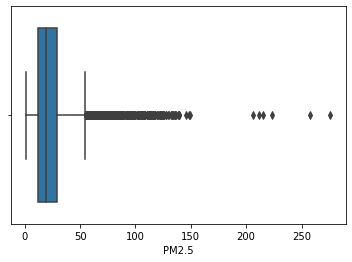

In [36]:
import seaborn as sns
sns.boxplot(data_102['PM2.5'])

25347


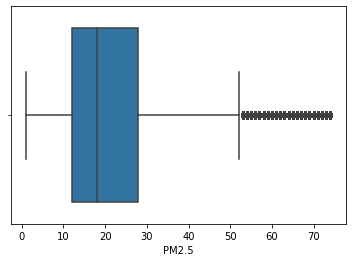

In [37]:
from scipy import stats
z = np.abs(stats.zscore(data_102['PM2.5']))
threshold = 3
#print(len(np.where(z > 3)))
data_102_Rout = data_102[(z < 3)]
print(len(data_102_Rout))
sns.boxplot(data_102_Rout['PM2.5'])

In [38]:
df=data_102_Rout['PM2.5']
df=df.values
df=df.reshape(df.shape[0],1)
print(df.shape)

(25347, 1)


In [39]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)
print(min(df),max(df))
list_=[]
for i in range (0,df_scaled.shape[0]):
  list_.append(df_scaled[i][0])
print(len(list_))
print(min(list_),max(list_))


[1.] [74.]
25347
0.0 1.0


In [40]:
window_size=5
y=[]
for i in range (0,len(list_)-window_size):
  x=list_[i:i+window_size]
  y.append(x)
print(len(y),y[0])


25342 [0.8493150684931505, 0.8493150684931505, 0.7671232876712328, 0.7397260273972601, 0.726027397260274]


In [41]:
matrix=np.matrix(y)
print(matrix.shape)
new_data = pd.DataFrame(matrix,columns=['x1','x2','x3','x4','y'])
new_data.head(10)


(25342, 5)


,x1,x2,x3,x4,y
0,0.849315,0.849315,0.767123,0.739726,0.726027
1,0.849315,0.767123,0.739726,0.726027,0.739726
2,0.767123,0.739726,0.726027,0.739726,0.753425
3,0.739726,0.726027,0.739726,0.753425,0.780822
4,0.726027,0.739726,0.753425,0.780822,0.739726
5,0.739726,0.753425,0.780822,0.739726,0.739726
6,0.753425,0.780822,0.739726,0.739726,0.821918
7,0.780822,0.739726,0.739726,0.821918,0.917808
8,0.739726,0.739726,0.821918,0.917808,0.958904
9,0.739726,0.821918,0.917808,0.958904,0.835616


In [42]:
print(matrix[:,4])

[[0.7260274 ]
 [0.73972603]
 [0.75342466]
 ...
 [0.24657534]
 [0.26027397]
 [0.21917808]]


In [43]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(matrix[:,0:4],matrix[:,4],test_size=0.33, random_state=42)
lm =linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'linear_regressor_Rout.pkl')
from google.colab import files
files.download('linear_regressor_Rout.pkl')
print(prediction.shape,prediction[0:5])

(8363, 1) [[0.0781173 ]
 [0.34602805]
 [0.0941562 ]
 [0.26220531]
 [0.47061681]]


In [44]:
print(model.score(X_train,y_train))
print(model.intercept_)
print(model.coef_)

0.9244360704727338
[0.01175041]
[[ 0.06794226 -0.07605383 -0.08852262  1.05362463]]


In [45]:
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

mean squared eror :  0.0028148360509342267
absolute mean error :  0.0349533764871426
0.9244758405424578


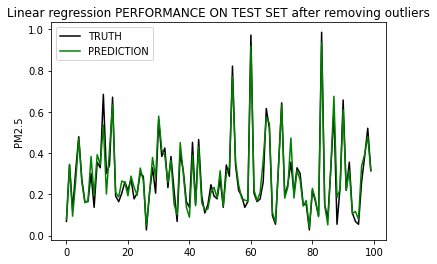

In [46]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Linear regression PERFORMANCE ON TEST SET after removing outliers')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

(25817, 1)
[1.] [276.]
25817
0.0 1.0
25812 [0.22545454545454546, 0.22545454545454546, 0.20363636363636364, 0.19636363636363638, 0.19272727272727272]
(8518, 1) [[0.13824838]
 [0.03055018]
 [0.0773337 ]
 [0.02098512]
 [0.01786613]]
mean squared eror :  0.0005528028414540618
absolute mean error :  0.010369148682733783
0.859459777365098


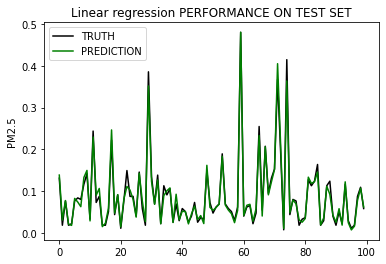

In [47]:
# IMPLEMENTING LINEAR REGRESSION WITHOUT REMOVING OUTLIERS
df=data_102['PM2.5']
df=df.values
df=df.reshape(df.shape[0],1)
print(df.shape)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)
print(min(df),max(df))
list_=[]
for i in range (0,df_scaled.shape[0]):
  list_.append(df_scaled[i][0])
print(len(list_))
print(min(list_),max(list_))
window_size=5
y=[]
for i in range (0,len(list_)-window_size):
  x=list_[i:i+window_size]
  y.append(x)
print(len(y),y[0])
matrix= np.matrix(y)
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(matrix[:,0:4],matrix[:,4],test_size=0.33, random_state=42)
lm =linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'linear_regressor.pkl')
from google.colab import files
files.download('linear_regressor.pkl')
print(prediction.shape,prediction[0:5])
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Linear regression PERFORMANCE ON TEST SET')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

In [48]:
# BAYESIAN RIDGE REGRESSION
from sklearn import linear_model
from statsmodels.tsa.ar_model import AR
model = linear_model.BayesianRidge()

model.fit(X_train,y_train )
prediction=model.predict(X_test)
joblib.dump(model,'bayesian_regressor.pkl')
from google.colab import files
files.download('bayesian_regressor.pkl')
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))

print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean squared eror :  0.0005527616160059668
absolute mean error :  0.010369859621815934
0.8594702581969951


In [49]:
# IMLEMENTING  RANDOM FOREST ALGORITHM
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(max_depth=8, random_state=0)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'randomforest_regressor.pkl')
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


mean squared eror :  0.0004143754078220413
absolute mean error :  0.009839894899836318
0.8946524733545939


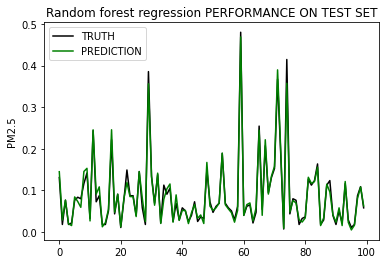

truth :  [[0.13090909]
 [0.01818182]
 [0.07636364]
 [0.01818182]
 [0.02181818]
 [0.07636364]
 [0.08363636]
 [0.08      ]
 [0.11636364]
 [0.14181818]]
prediction :  [0.14495937 0.02884607 0.07691271 0.01995962 0.01560188 0.08435757
 0.07339727 0.05943241 0.14548515 0.15308849]


In [50]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Random forest regression PERFORMANCE ON TEST SET')
plt.ylabel('PM2.5')
plt.legend()
plt.show()
print('truth : ',y_test[0:10])
print('prediction : ',prediction[0:10])

In [51]:
# RIDGE REGRESSION
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'ridge_regressor.pkl')
from google.colab import files
files.download('ridge_regressor.pkl')
print(mean_squared_error(y_test,prediction))
print(mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))


0.0005434128456467069
0.010629054576561724
0.8618470156394804


In [52]:
# IMPLEMENTING SUPPORT VECTOR
from sklearn.svm import LinearSVR
model= LinearSVR()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean squared eror :  0.0006228186156077384
absolute mean error :  0.009969032093040677
0.8416595206557981


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


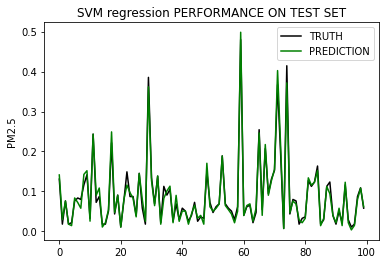

In [53]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('SVM regression PERFORMANCE ON TEST SET')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

In [54]:
# IMPLEMENTING A NEURAL NETWORK
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X = sc.fit_transform(X)
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='relu'))


model.compile(optimizer = "adam", loss ='mse', 
          metrics =["accuracy"])
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
17294/17294 [==============================] - 2s 128us/step - loss: 5.2568e-04 - accuracy: 0.0041
Epoch 2/100
17294/17294 [==============================] - 2s 121us/step - loss: 3.8108e-04 - accuracy: 0.0041
Epoch 3/100
17294/17294 [==============================] - 2s 118us/step - loss: 3.8176e-04 - accuracy: 0.0041
Epoch 4/100
17294/17294 [==============================] - 2s 121us/step - loss: 3.7330e-04 - accuracy: 0.0041
Epoch 5/100
17294/17294 [==============================] - 2s 120us/step - loss: 3.7951e-04 - accuracy: 0.0041
Epoch 6/100
17294/17294 [==============================] - 2s 122us/step - loss: 3.6526e-04 - accuracy: 0.0041
Epoch 7/100
17294/17294 [==============================] - 2s 120us/step - loss: 3.7049e-04 - accuracy: 0.0041
Epoch 8/100
17294/17294 [==============================] - 2s 121us/step - loss: 3.6999e-04 - accuracy: 0.0041
Epoch 9/100
17294/17294 [==============================] - 2s 119us/step - loss: 3.7277e-04 - accuracy: 0.0041
E

dict_keys(['loss', 'accuracy'])


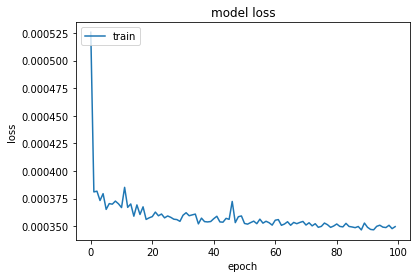

mean squared error :  0.00041476570006580057
mean absolute error :  0.009969032093040677
0.8416595206557981


In [55]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
y_pred = model.predict(X_test)
print('mean squared error : ',mean_squared_error(y_test,y_pred))
print('mean absolute error : ',mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))
#Converting predictions to label


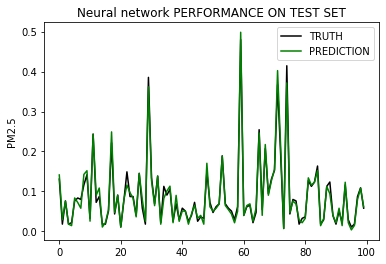

In [56]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Neural network PERFORMANCE ON TEST SET')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

In [57]:
print(X_train)
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)

print(X_train.shape)
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
print(X_train.shape)

[[0.09090909 0.06909091 0.06909091 0.07636364]
 [0.21454545 0.18545455 0.23272727 0.23272727]
 [0.05454545 0.06909091 0.07272727 0.06909091]
 ...
 [0.24727273 0.29090909 0.29818182 0.25090909]
 [0.04727273 0.06909091 0.06545455 0.07272727]
 [0.08727273 0.08       0.08363636 0.08363636]]
(17294, 4)
(17294, 4, 1)


In [58]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
#regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
17294/17294 [==============================] - 27s 2ms/step - loss: 0.0012
Epoch 2/100
17294/17294 [==============================] - 26s 1ms/step - loss: 7.2755e-04
Epoch 3/100
17294/17294 [==============================] - 26s 1ms/step - loss: 4.9796e-04
Epoch 4/100
17294/17294 [==============================] - 26s 1ms/step - loss: 4.7807e-04
Epoch 5/100
17294/17294 [==============================] - 26s 1ms/step - loss: 4.5435e-04
Epoch 6/100
17294/17294 [==============================] - 25s 1ms/step - loss: 4.3350e-04
Epoch 7/100
17294/17294 [==============================] - 26s 1ms/step - loss: 4.2132e-04
Epoch 8/100
17294/17294 [==============================] - 26s 1ms/step - loss: 4.2439e-04
Epoch 9/100
17294/17294 [==============================] - 26s 1ms/step - loss: 4.1858e-04
Epoch 10/100
17294/17294 [==============================] - 26s 1ms/step - loss: 4.3112e-04
Epoch 11/100
17294/17294 [==============================] - 26s 1ms/step - loss: 4.1534e-04
E

dict_keys(['loss'])


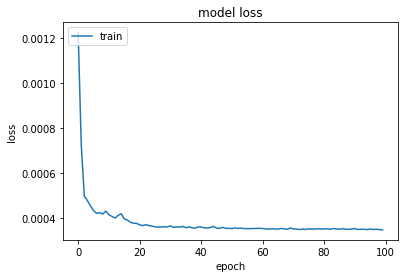

mean square error : 0.000420088823689956
mean absolute error :  0.010593058922961788
0.893199939688214


In [59]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
prediction = regressor.predict(X_test)
print("mean square error :" ,mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print("mean absolute error : ",mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

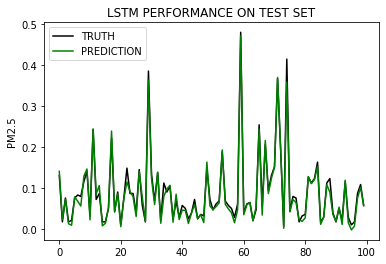

In [60]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('LSTM PERFORMANCE ON TEST SET')
plt.ylabel('PM2.5')
plt.legend()
plt.show()